In [29]:
# -------------------------------------------------------------
# Step 1: Import necessary libraries
# -------------------------------------------------------------
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")
print("✅ Libraries imported.")


✅ Libraries imported.


In [30]:
# -------------------------------------------------------------
# Step 2: Load the raw dataset
# -------------------------------------------------------------
print("📥 Loading dataset...")

df = pd.read_csv("../data/processed/cleaned-kubestronaut-prediction-data.csv")

print("✅ Dataset loaded successfully!")
print("Initial data shape:", df.shape)
print("\n🔍 Preview of data:")
print(df.head())

# Get the maximum value of each column
print("Maximum values for each column:")
max_values = df.max()
print(max_values)


📥 Loading dataset...
✅ Dataset loaded successfully!
Initial data shape: (1000, 6)

🔍 Preview of data:
   theory_hours  lab_hours  k8s_experience_level  response_speed  \
0           102        110                     2           55.48   
1           179        227                     7           43.46   
2            92        110                     9           51.46   
3            14         33                     3           53.95   
4           106        110                     1           38.59   

   exam_attempts  final_result  
0              5             0  
1              1             0  
2              5             0  
3              5             0  
4              5             1  
Maximum values for each column:
theory_hours            200.00
lab_hours               300.00
k8s_experience_level     10.00
response_speed           59.89
exam_attempts             5.00
final_result              1.00
dtype: float64


In [25]:
# -------------------------------------------------------------
# Step 3: Understand structure — schema, datatypes, nulls
# -------------------------------------------------------------
print("\n📊 Data types and null value check:")
print(df.info())

print("\n❓ Any missing values?")
print(df.isnull().sum())



📊 Data types and null value check:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 0 entries
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   theory_hours          0 non-null      int64  
 1   lab_hours             0 non-null      int64  
 2   k8s_experience_level  0 non-null      int64  
 3   response_speed        0 non-null      float64
 4   exam_attempts         0 non-null      int64  
 5   final_result          0 non-null      int64  
dtypes: float64(1), int64(5)
memory usage: 0.0 bytes
None

❓ Any missing values?
theory_hours            0.0
lab_hours               0.0
k8s_experience_level    0.0
response_speed          0.0
exam_attempts           0.0
final_result            0.0
dtype: float64


In [32]:
# Step 3: Drop malformed rows (like the one with missing columns)
df = df.dropna()
df = df[df['theory_hours'] > 1]  # basic sanity checks
df = df[df['lab_hours'] > 1]

In [33]:
# -------------------------------------------------------------
# Step 4: Standardize column names (basic cleanup)
# -------------------------------------------------------------
print("\n🧹 Cleaning column names (lowercase, underscores)...")

df.columns = df.columns.str.strip().str.lower().str.replace(" ", "_")
print("✅ Column names standardized:")
print(df.columns.tolist())



🧹 Cleaning column names (lowercase, underscores)...
✅ Column names standardized:
['theory_hours', 'lab_hours', 'k8s_experience_level', 'response_speed', 'exam_attempts', 'final_result']


In [34]:
# -------------------------------------------------------------
# Step 5: Basic stats check (spot outliers or issues)
# -------------------------------------------------------------
print("\n📈 Basic summary stats for numeric columns:")
print(df.describe())



📈 Basic summary stats for numeric columns:
       theory_hours   lab_hours  k8s_experience_level  response_speed  \
count    941.000000  941.000000            941.000000      941.000000   
mean     106.821467  150.047821              4.897981       34.621488   
std       54.618892   88.309410              3.053461       14.309895   
min       11.000000    2.000000              0.000000       10.000000   
25%       57.000000   75.000000              2.000000       23.000000   
50%      109.000000  151.000000              5.000000       34.380000   
75%      152.000000  225.000000              8.000000       46.450000   
max      200.000000  300.000000             10.000000       59.890000   

       exam_attempts  final_result  
count     941.000000    941.000000  
mean        3.074389      0.048884  
std         1.414512      0.215741  
min         1.000000      0.000000  
25%         2.000000      0.000000  
50%         3.000000      0.000000  
75%         4.000000      0.000000  
ma


📊 Plotting distribution of theory hours...


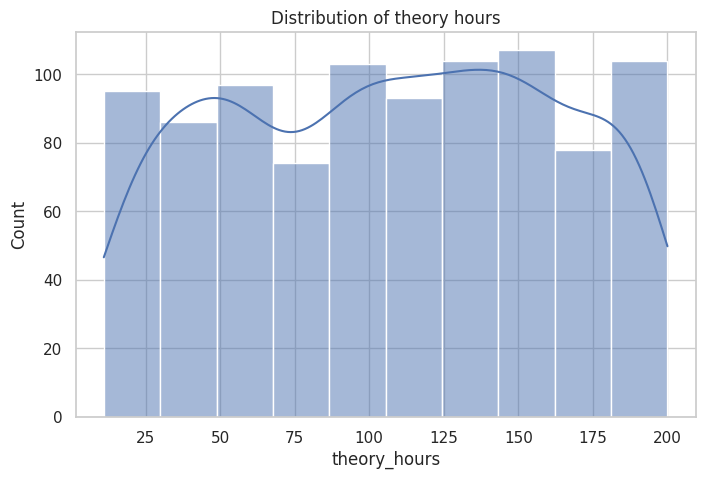

In [35]:
# -------------------------------------------------------------
# Step 6: Visual check for distributions (e.g. price, sqft)
# -------------------------------------------------------------
print("\n📊 Plotting distribution of theory hours...")

plt.figure(figsize=(8, 5))
sns.histplot(df["theory_hours"], kde=True, bins=10)
plt.title("Distribution of theory hours")
plt.xlabel("theory_hours")
plt.ylabel("Count")
plt.show()


In [36]:
# -------------------------------------------------------------
# Step 7: Check for obvious data issues
# -------------------------------------------------------------
print("\n🔍 Looking for negative or unrealistic values...")

for col in ['theory_hours', 'lab_hours', 'k8s_experience_level', 'response_speed', 'exam_attempts']:
    invalid = df[df[col] < 0]
    if not invalid.empty:
        print(f"⚠️ Found negative values in {col}:\n{invalid}")
    else:
        print(f"✅ No negative values found in {col}.")



🔍 Looking for negative or unrealistic values...
✅ No negative values found in theory_hours.
✅ No negative values found in lab_hours.
✅ No negative values found in k8s_experience_level.
✅ No negative values found in response_speed.
✅ No negative values found in exam_attempts.


In [37]:
# -------------------------------------------------------------
# Step 8: Drop duplicates if any
# -------------------------------------------------------------
print("\n🧹 Checking for duplicate rows...")

duplicates = df.duplicated().sum()
if duplicates > 0:
    print(f"⚠️ Found {duplicates} duplicate rows. Dropping them...")
    df = df.drop_duplicates()
else:
    print("✅ No duplicate rows found.")



🧹 Checking for duplicate rows...
✅ No duplicate rows found.


In [38]:
# -------------------------------------------------------------
# Step 9: Save the cleaned version (optional here)
# -------------------------------------------------------------
print("\n💾 Saving cleaned version to interim file (optional step)...")

# Uncomment if you want to save at this point
# df.to_csv("../data/interim/cleaned_house_data_v1.csv", index=False)
print("✅ Data engineering preprocessing complete!")



💾 Saving cleaned version to interim file (optional step)...
✅ Data engineering preprocessing complete!
